In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# 2.Load Dataset
data = pd.read_csv("hanoi_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2019,76,1,15,36,7,7
1,3/2/2019,117,64,4,28,3,5
2,3/3/2019,10,64,1,22,16,5
3,3/4/2019,118,56,13,22,14,6
4,3/5/2019,2,34,15,21,6,6
...,...,...,...,...,...,...,...
1915,5/28/2024,85,56,14,1,8,6
1916,5/29/2024,58,50,13,1,8,6
1917,5/30/2024,47,39,10,1,8,8
1918,5/31/2024,48,63,10,1,8,8


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1920 non-null   object
 1   pm25    1920 non-null   int64 
 2   pm10    1920 non-null   int64 
 3   o3      1920 non-null   int64 
 4   no2     1920 non-null   int64 
 5   so2     1920 non-null   int64 
 6   co      1920 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 105.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,63.091667,39.147917,16.548958,19.444271,11.690104,7.580208
std,40.260213,21.942295,16.580522,10.014321,6.428450,2.986652
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,32.000000,22.000000,8.000000,13.000000,7.000000,5.000000
50%,54.500000,36.000000,14.000000,19.000000,11.000000,7.000000
75%,88.000000,54.000000,21.000000,27.000000,17.000000,9.000000
max,217.000000,121.000000,441.000000,53.000000,43.000000,21.000000


In [4]:
#Chọn thuộc tính
data = data[['pm25']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25
0,76
1,117
2,10
3,118
4,2
...,...
1915,85
1916,58
1917,47
1918,48


<Axes: >

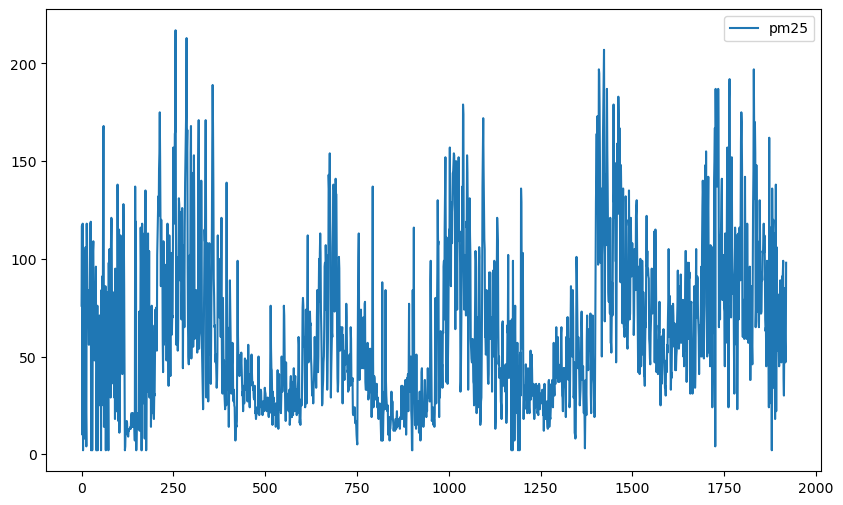

In [5]:
data.plot(figsize=(10,6))

In [6]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 7:3
train_size = int(0.7 * len(data))
test_size = int(0.3 * len(data))

# Chia dữ liệu thành các tập
train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))


Train data size: 1344
Test data size: 576


In [7]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['pm25'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12582.523, Time=1.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12892.531, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12810.779, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12734.200, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12890.535, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12582.161, Time=1.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12616.232, Time=0.74 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12580.384, Time=0.94 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12582.200, Time=1.60 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12736.285, Time=1.25 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=12578.416, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=12732.210, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=12808.785, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=12580.232, Time=0.70 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [8]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(n_periods=len(y_test))


In [9]:
# 4. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index + 1, stop=last_index+31, step=1)

# Tạo mảng 30 ngày 
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán 30 ngày tiếp theo
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# # In ra dự đoán giá trong 30 ngày tiếp theo
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[28.8613088  37.536981   41.75096604 43.79780109 44.79199867 45.27490462
 45.50946379 45.62339488 45.67873399 45.70561354 45.71866959 45.72501123
 45.72809152 45.72958769 45.73031442 45.73066741 45.73083886 45.73092214
 45.73096259 45.73098224 45.73099178 45.73099642 45.73099867 45.73099976
 45.7310003  45.73100055 45.73100068 45.73100074 45.73100077 45.73100078]


In [10]:
# 5. Tính RMSE
test_rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print('Testing RMSE:', test_rmse)

# 6. Tính MAPE
test_mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
print('\nTesting MAPE:', test_mape)

# 7. Tính MAE
test_mae = np.mean(np.abs(y_test - y_pred))
print("\nMAE:", test_mae)

Testing RMSE: 54.07268907479839

Testing MAPE: 52.94703525366965

MAE: 41.46883418734108


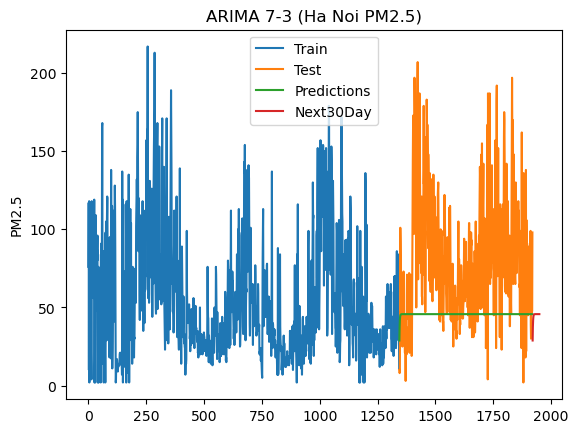

In [11]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.title('ARIMA 7-3 (Ha Noi PM2.5)')
plt.ylabel('PM2.5')
plt.show()

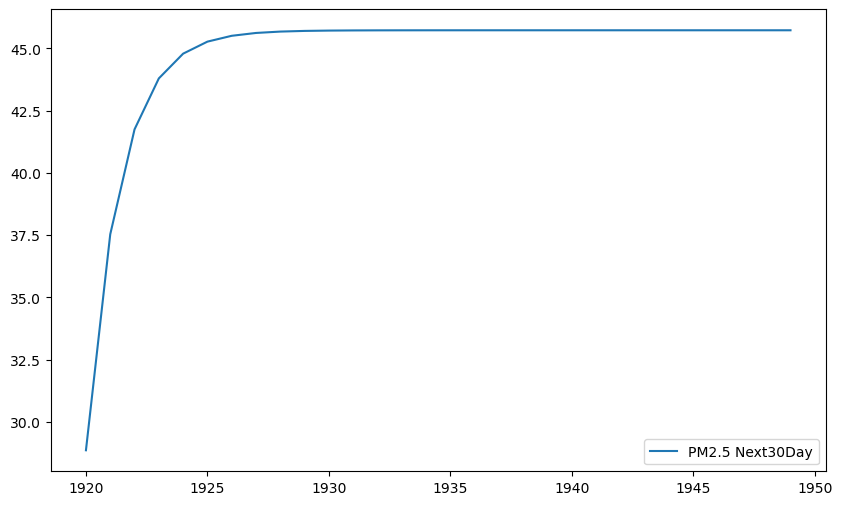

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(last_data,y_next_30_days)
plt.legend(['PM2.5 Next30Day'])
plt.show()

In [13]:
test_data.index

RangeIndex(start=1344, stop=1920, step=1)